In [1]:
%pylab inline
import pandas as pd
import numpy as np
%config InlineBackend.figure_format = 'retina'
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

Populating the interactive namespace from numpy and matplotlib


In [2]:
from somde import SomNode

In [3]:
dataname = '../workspace/slideseq_data/Puck_180819_19_'
df = pd.read_csv(dataname+'count.csv',sep=',',index_col=1)
corinfo = pd.read_csv(dataname+'idx.csv',sep=',',index_col=0)
del(df['ENSEMBL'])
print(df.shape)

(2555, 9699)


In [4]:
corinfo["total_count"]=df.sum(0)

In [5]:
X=corinfo[['x','y']].values.astype(np.float32)

using 22*22 SOM nodes for 9699 points
CPU times: user 47.8 s, sys: 0 ns, total: 47.8 s
Wall time: 859 ms


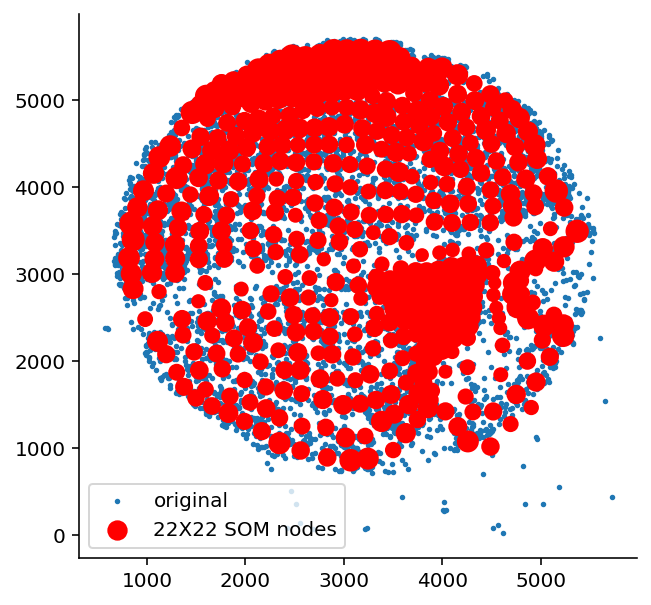

In [11]:
%time som = SomNode(X,20)
figsize(5,5)
som.view()
savefig('README_files/r2.png',bbox_inches='tight')

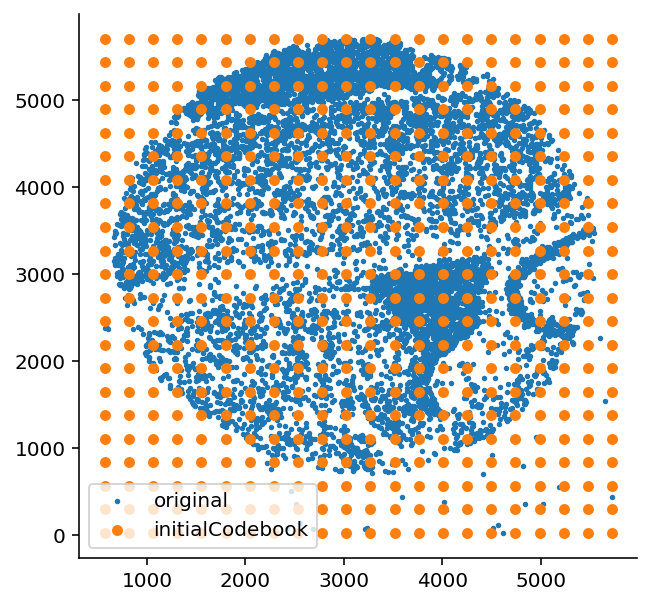

In [10]:
som.viewIniCodebook()
savefig('README_files/r1.png',bbox_inches='tight')

In [7]:
som.reTrain(100)

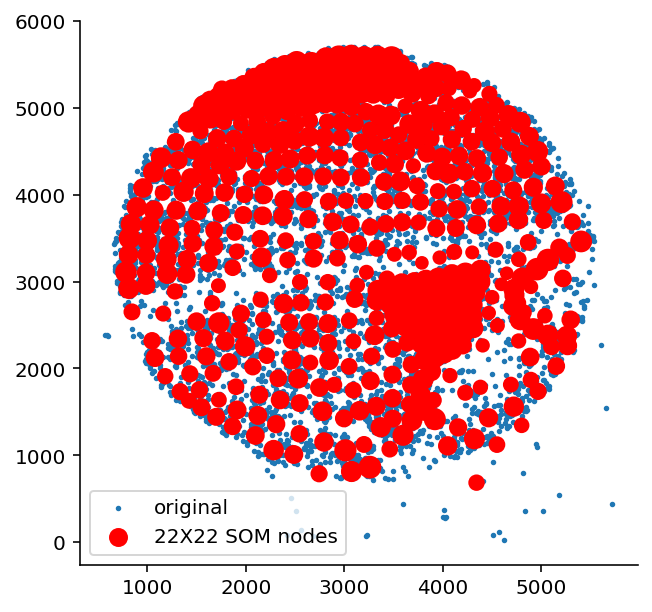

In [8]:
som.view()

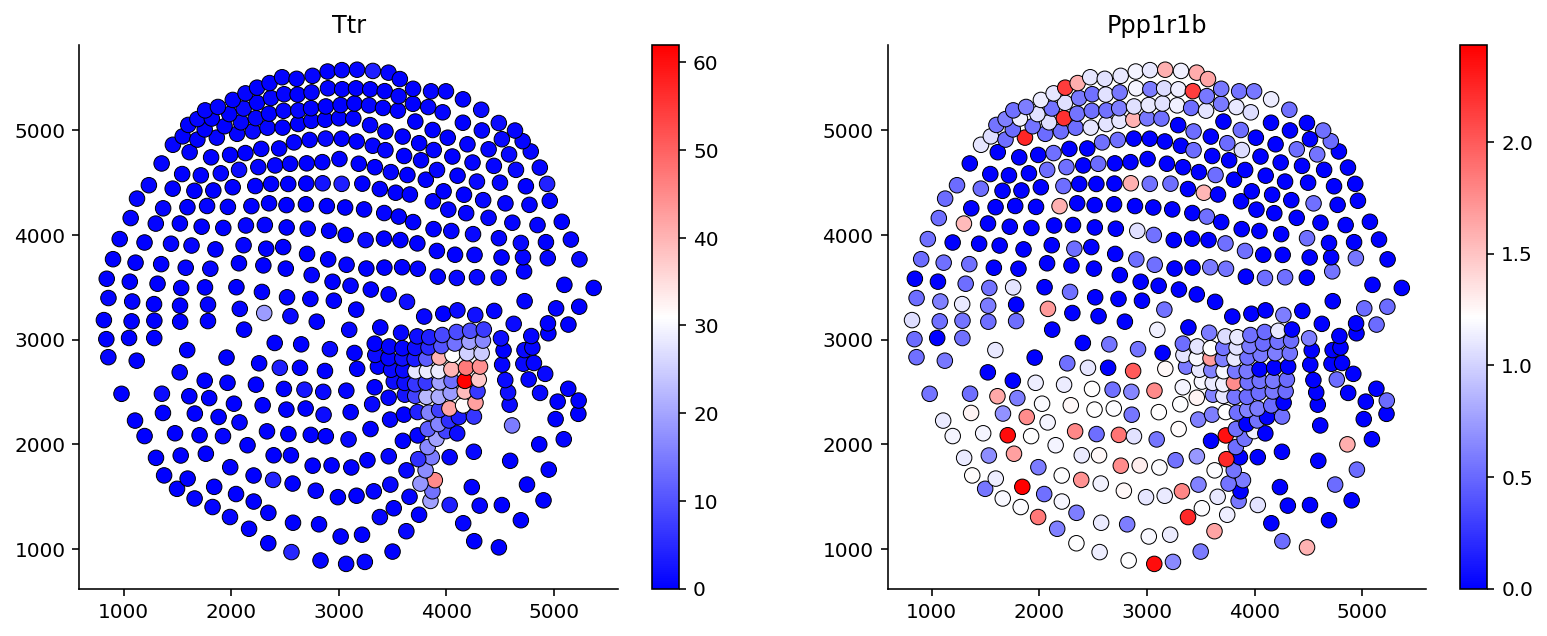

In [30]:
plotgene(ninfo[['x','y']].values,ndf,['Ttr','Ppp1r1b'],['Ttr','Ppp1r1b'],sp=60,lw=0.5,plotsize=5)
savefig('README_files/r3.png',bbox_inches='tight')

In [12]:
%time ndf,ninfo = som.mtx(df)

CPU times: user 1.42 s, sys: 0 ns, total: 1.42 s
Wall time: 1.51 s


In [13]:
nres = som.norm()

In [14]:
result, SVnum =som.run()

 60%|█████▉    | 1531/2555 [00:05<00:03, 307.26it/s]/home/hms/anaconda3/envs/sc/lib/python3.8/site-packages/somde/util.py:310: RuntimeWarning: divide by zero encountered in double_scalars
  s2_logdelta = 1. / (derivative(LL_obj, np.log(max_delta), n=2) ** 2)

Models: 100%|██████████| 10/10 [01:38<00:00,  9.86s/it]


In [15]:
from somde.util import *

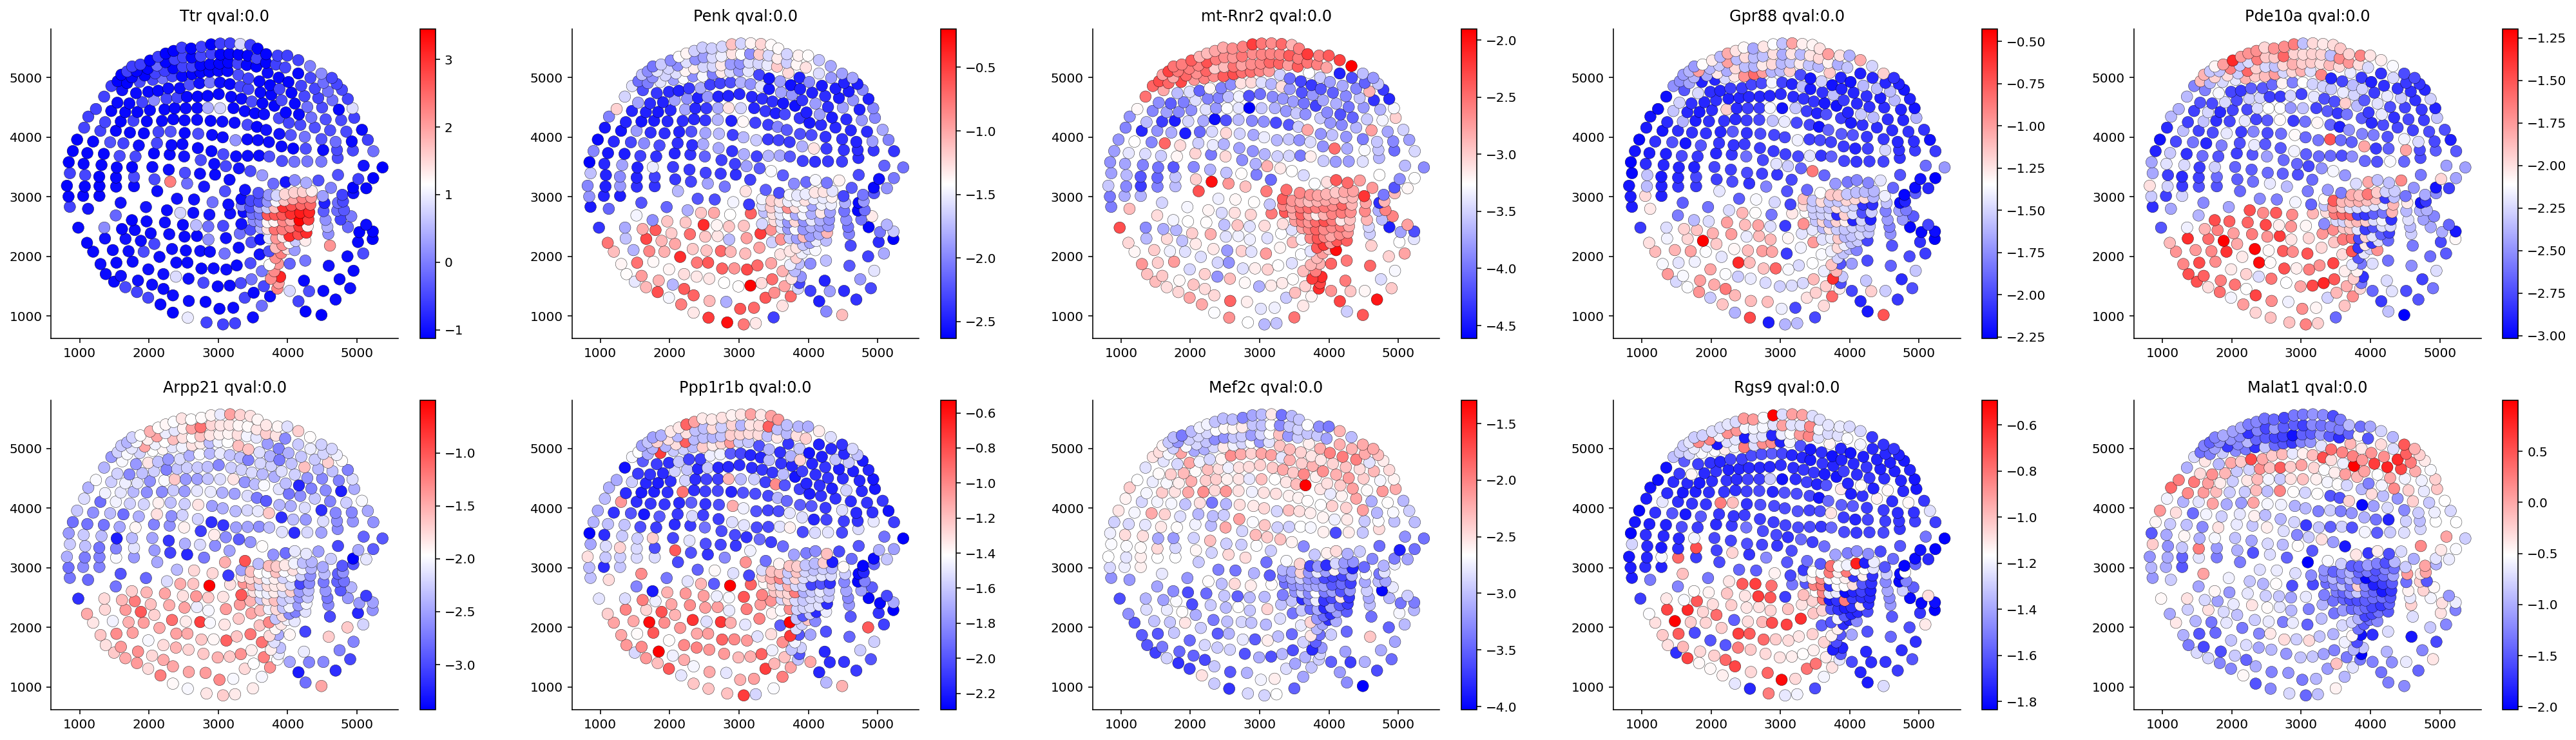

In [18]:
plotgene(ninfo[['x','y']].values,nres.T,result.g.to_list()[:10],result,sp=80,lw=0.2,plotsize=5)
savefig('README_files/r4.png',bbox_inches='tight')

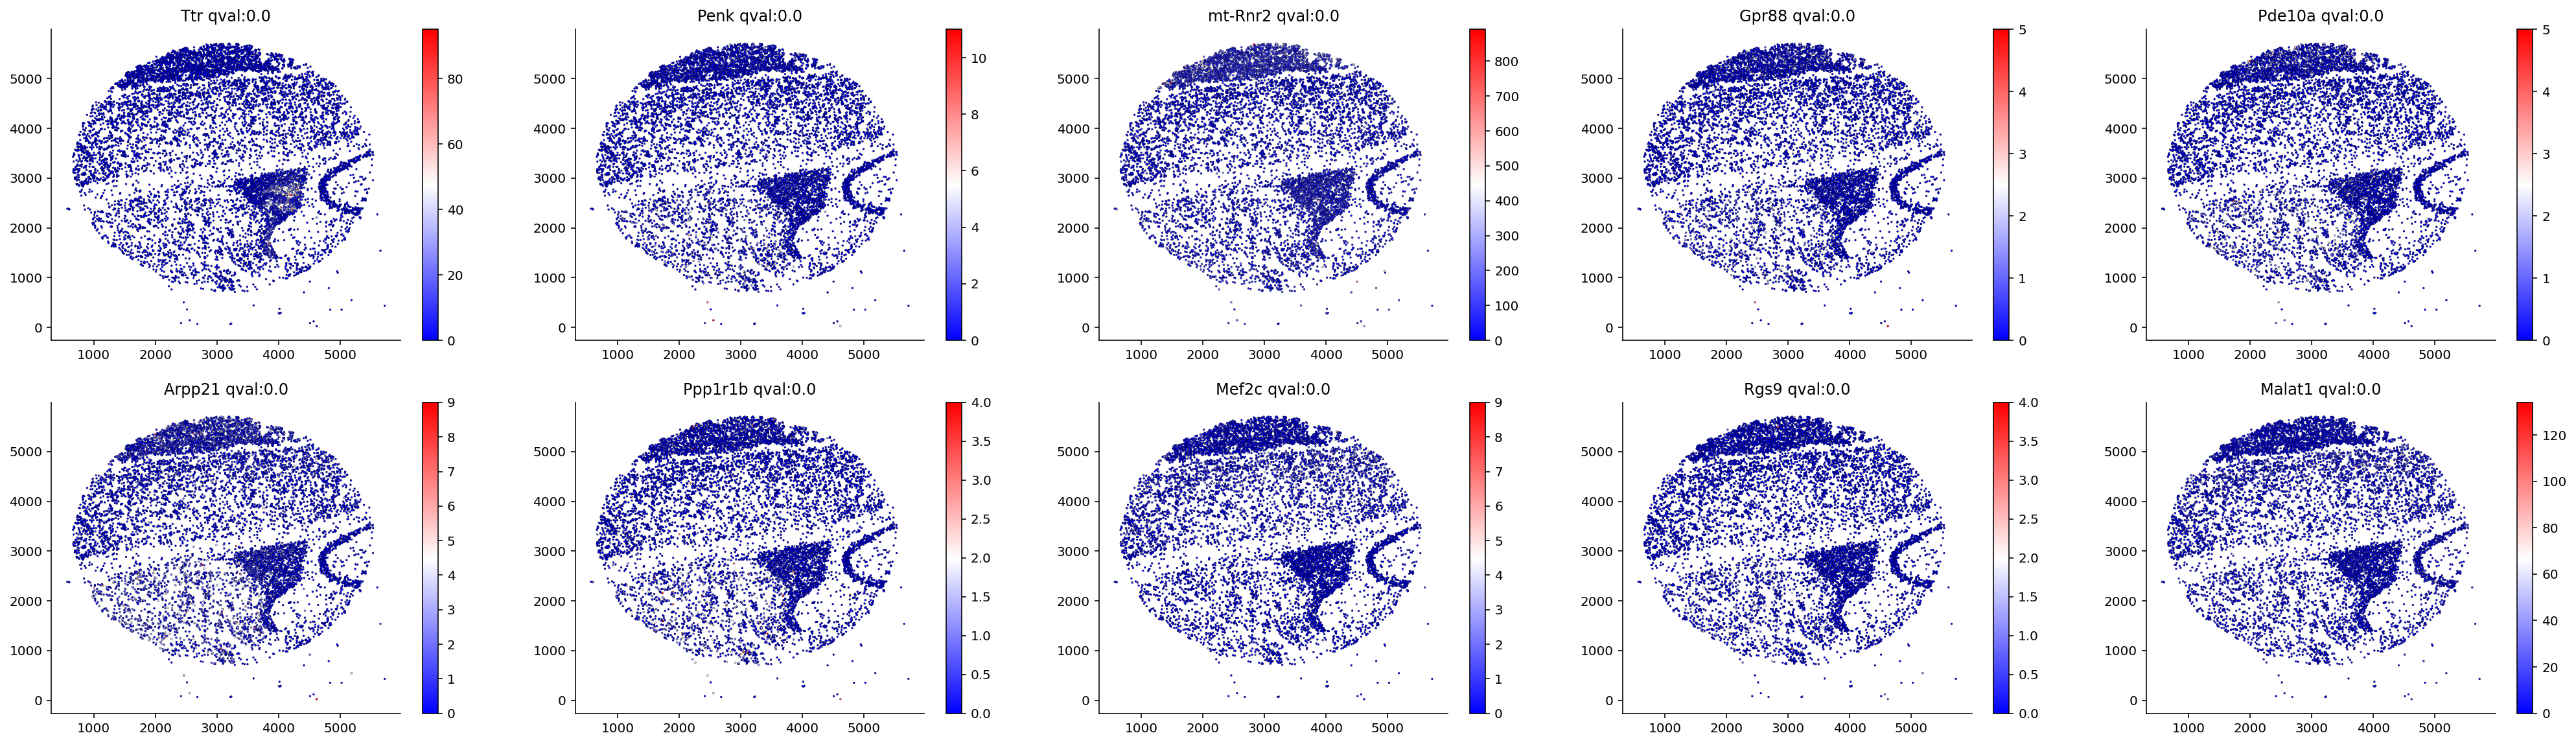

In [19]:
plotgene(corinfo[['x','y']].values,df,result.g.to_list()[:10],result,sp=2,lw=0.2,plotsize=5)
savefig('README_files/r5.png',bbox_inches='tight')

In [16]:
SVnum

418

In [20]:
result[:50]

FSV  M              g            l  max_delta      max_ll  \
1173  0.656491  4            Ttr   245.147049   0.512315 -423.413348   
2056  0.592428  4           Penk   842.963305   0.557818 -192.903912   
1547  0.564153  4        mt-Rnr2   454.587688   0.720884 -253.791315   
1821  0.476550  4          Gpr88   842.963305   0.890615  -83.901340   
2047  0.528402  4         Pde10a   842.963305   0.723653 -123.646725   
1607  0.476152  4         Arpp21   842.963305   0.892035 -187.573467   
2085  0.431148  4        Ppp1r1b   842.963305   1.069784 -123.946983   
1936  0.400840  4          Mef2c   842.963305   1.211980 -144.716352   
1435  0.480509  4           Rgs9   454.587688   1.008803  -31.913631   
1337  0.507542  4         Malat1   454.587688   0.905372 -273.139547   
2222  0.487499  4         Snap25   842.963305   0.852402 -125.870342   
1148  0.446744  4          Enpp2   245.147049   1.212536 -263.448614   
1162  0.577684  4           Pcp4   245.147049   0.715771 -177.807548   
1665  0.293967  4            Cck   842.963305   1.947379 -128.014913   
1374  0.357479  4           Nrgn   454.587688   1.677124 -139.445594   
1992  0.370304  4           Nexn   842.963305   1.378781  -79.560847   
2044  0.282069  4         Pcp4l1   842.963305   2.063715 -154.305091   
1937  0.311336  4          Meis2   842.963305   1.793496  -93.701030   
2437  0.518341  4           Gng7  1563.146455   0.514956  -26.505956   
1501  0.403772  4           Syt1   454.587688   1.377861  -94.200073   
1346  0.395700  4           Meg3   454.587688   1.425001 -265.677725   
2013  0.287314  4           Nrn1   842.963305   2.011242  -72.668020   
1971  0.265418  4          Ncald   842.963305   2.244055 -151.620382   
1813  0.279287  4           Gnal   842.963305   2.092347 -125.817356   
1734  0.296493  4           Dgkb   842.963305   1.923874 -171.016971   
1223  0.361484  4        Camk2n1   454.587688   1.648208 -105.232447   
2469  0.430946  4          Pde1b  1563.146455   0.731773  -69.168204   
2484  0.369035  4          Rasd2  1563.146455   0.947509  -98.320355   
1897  0.256360  4         Klhl13   842.963305   2.351984  -28.378929   
1570  0.323460  4          Adcy5   842.963305   1.695885  -18.980792   
2353  0.201820  4          Vsnl1   842.963305   3.206712 -103.865999   
2269  0.332800  4           Tac1   842.963305   1.625536 -128.498996   
1546  0.280319  4        mt-Rnr1   454.587688   2.395616 -301.108892   
1348  0.272167  4         Mical2   454.587688   2.495321  -16.275124   
2187  0.247137  4          Scn4b   842.963305   2.470028 -113.249894   
1548  0.200366  4  1110008P14Rik   842.963305   3.235872  -97.407875   
2048  0.236429  4          Pde1a   842.963305   2.618619 -113.548771   
1741  0.206860  4         Dlgap1   842.963305   3.108819 -108.332712   
2230  0.225909  4          Sparc   842.963305   2.778311  -98.783626   
1792  0.343479  4          Foxp1   842.963305   1.549782 -114.238546   
1372  0.286973  4          Nptxr   454.587688   2.318432  -84.926329   
1470  0.240455  4        Slc17a7   454.587688   2.947463  -17.603652   
2025  0.248174  4          Olfm1   842.963305   2.456309 -115.179541   
1395  0.339325  4           Plp1   454.587688   1.816775 -523.970673   
2237  0.269816  4         Spock3   842.963305   2.194255 -118.669200   
1477  0.334453  4         Snhg11   454.587688   1.856834 -211.783469   
1991  0.353354  4        Neurod6   842.963305   1.483815 -107.877993   
2037  0.172468  4           Pak1   842.963305   3.890454 -122.463310   
1387  0.215848  4         Pgm2l1   454.587688   3.389862 -117.979734   
1210  0.308083  4         Bcl11b   454.587688   2.095630 -162.671606   

      max_mu_hat  max_s2_t_hat model    n    s2_FSV  s2_logdelta      time  \
1173   -0.552707      0.396814    SE  484  0.000041     0.000902  0.002636   
2056   -1.677282      0.241277    SE  484  0.000792     0.015675  0.003358   
1547   -3.208680      0.560373    SE  484  0.000201     0.003863  0.003002   
1821   -1.688733      0.12